In [11]:
!pip install spacy

In [12]:
!pip install wordcloud

In [13]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [14]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 55.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [15]:
import nltk
import spacy
nlp = spacy.load('en_core_web_sm')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize,sent_tokenize
import warnings
warnings.filterwarnings('ignore')

In [26]:
df = pd.read_csv('/content/sample_data/apple.txt',sep='\t')
df

,x
0,It's amazing..... battery last around 10 -12 h...
1,Finally a MacBook possession. Got it in 50k in...
2,Best Laptop under 60k. If you don't want any a...
3,Pros:1. Light weight and super fast response t...
4,I have been a Macbook pro user for last 2 year...
5,""""
6,I am very upset about the product as I checked...
7,Reason for 1 star is I ot an defective piece. ...
8,Got the Apple Macbook air on amazon discount s...
9,White line coming on screen in just three mont...


In [28]:
df1 = [i.strip() for i in df.x]
df1

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders",
 "Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by wo

In [29]:
text = ' '.join(df1)
text

'It\'s amazing..... battery last around 10 -12 hrs.....best laptop for students and coders Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can\'t be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by worki

In [34]:
aff = pd.read_csv('/content/sample_data/Afinn.csv',encoding='latin-1')
aff.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [35]:
aff.shape

(2477, 2)

In [ ]:
# dict1 = {'Age'  : [10]}
# dict1.get('Names',0)

In [38]:
aff_dict = aff.set_index('word')['value'].to_dict()
aff_dict

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [45]:
print(aff_dict.get('happy',0))
print(aff_dict.get('bad',0))

3
-3


In [47]:
def sentiment_count(text:str=None):
  sent_ct=0
  if text:
    doc=nlp(text)
    for token in doc:
      sent_ct+=aff_dict.get(token.lemma_,0)
  return sent_ct

In [48]:
sentiment_count('iam very happy from past 3 months')

3

In [54]:
sent_df = pd.DataFrame(sent_tokenize(text),columns=['sentence'])
sent_df.shape

(215, 1)

In [55]:
sent_df.head()

,sentence
0,It's amazing..... battery last around 10 -12 h...
1,Got it in 50k in Diwali sale.
2,Technically good laptop.Good News.luxury produ...
3,Terrific sense of possession & pride.Bad News.
4,Problems will be there if you are switching fr...


In [56]:
sent_df['words_count'] = sent_df['sentence'].str.split().apply(len)

In [58]:
sent_df.head()

,sentence,words_count
0,It's amazing..... battery last around 10 -12 h...,17
1,Got it in 50k in Diwali sale.,7
2,Technically good laptop.Good News.luxury produ...,31
3,Terrific sense of possession & pride.Bad News.,7
4,Problems will be there if you are switching fr...,65


In [59]:
sent_df['sentiment'] = sent_df['sentence'].apply(sentiment_count)
sent_df.head()

,sentence,words_count,sentiment
0,It's amazing..... battery last around 10 -12 h...,17,7
1,Got it in 50k in Diwali sale.,7,0
2,Technically good laptop.Good News.luxury produ...,31,5
3,Terrific sense of possession & pride.Bad News.,7,4
4,Problems will be there if you are switching fr...,65,-11


<Axes: ylabel='sentiment'>

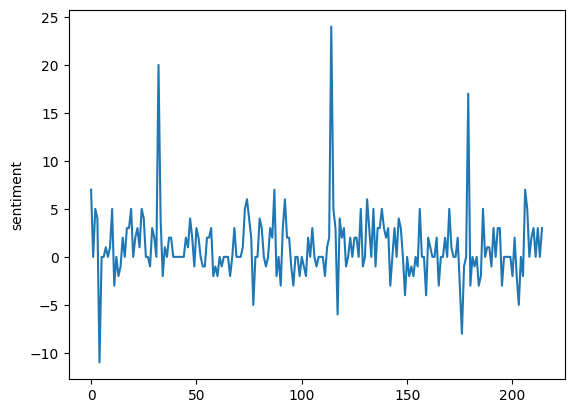

In [60]:
sns.lineplot(data=sent_df,x=range(len(sent_df)),y='sentiment')

<Axes: xlabel='sentiment', ylabel='Density'>

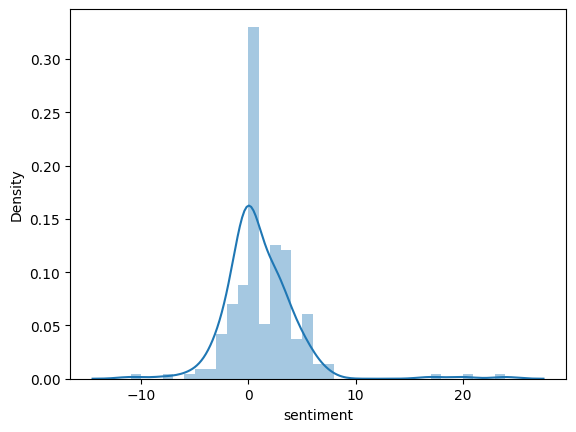

In [61]:
sns.distplot(sent_df['sentiment'])

In [62]:
!pip install textblob

In [63]:
from textblob import TextBlob

In [64]:
def text_sentiment(text):
  Sentence = TextBlob(text)
  return TextBlob(text).sentiment.polarity

In [72]:
def blob_sentiment(text):
  sentence = TextBlob(text)
  sentiment = sentence.sentiment.polarity
  if sentiment > 0:
    return 1
  else:
    return 0

In [68]:
text_sentiment('i am very sad')

-0.65

In [73]:
sent_df['text_blob_sentiment'] = sent_df['sentence'].apply(blob_sentiment)
sent_df.head()

,sentence,words_count,sentiment,text_blob_sentiment
0,It's amazing..... battery last around 10 -12 h...,17,7,1
1,Got it in 50k in Diwali sale.,7,0,0
2,Technically good laptop.Good News.luxury produ...,31,5,1
3,Terrific sense of possession & pride.Bad News.,7,4,0
4,Problems will be there if you are switching fr...,65,-11,0
